# Proyecto 18

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [ ]:
# Consultar la Api
url = 'https://api.thedogapi.com/v1/breeds'
api_key = 

In [3]:
respuesta = requests.get(url, api_key)

In [4]:
respuesta

<Response [200]>

In [5]:
data = respuesta.json()

In [6]:
data

[{'weight': {'imperial': '6 - 13', 'metric': '3 - 6'},
  'height': {'imperial': '9 - 11.5', 'metric': '23 - 29'},
  'id': 1,
  'name': 'Affenpinscher',
  'bred_for': 'Small rodent hunting, lapdog',
  'breed_group': 'Toy',
  'life_span': '10 - 12 years',
  'temperament': 'Stubborn, Curious, Playful, Adventurous, Active, Fun-loving',
  'origin': 'Germany, France',
  'reference_image_id': 'BJa4kxc4X'},
 {'weight': {'imperial': '50 - 60', 'metric': '23 - 27'},
  'height': {'imperial': '25 - 27', 'metric': '64 - 69'},
  'id': 2,
  'name': 'Afghan Hound',
  'country_code': 'AG',
  'bred_for': 'Coursing and hunting',
  'breed_group': 'Hound',
  'life_span': '10 - 13 years',
  'temperament': 'Aloof, Clownish, Dignified, Independent, Happy',
  'origin': 'Afghanistan, Iran, Pakistan',
  'reference_image_id': 'hMyT4CDXR'},
 {'weight': {'imperial': '44 - 66', 'metric': '20 - 30'},
  'height': {'imperial': '30', 'metric': '76'},
  'id': 3,
  'name': 'African Hunting Dog',
  'bred_for': 'A wild pack

In [7]:
datos_perro = pd.DataFrame(data)

In [49]:
datos_perro.head()

,weight,height,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history
0,"{'imperial': '6 - 13', 'metric': '3 - 6'}","{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,NaN,NaN,NaN
1,"{'imperial': '50 - 60', 'metric': '23 - 27'}","{'imperial': '25 - 27', 'metric': '64 - 69'}",2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,NaN,NaN
2,"{'imperial': '44 - 66', 'metric': '20 - 30'}","{'imperial': '30', 'metric': '76'}",3,African Hunting Dog,A wild pack animal,NaN,11 years,"Wild, Hardworking, Dutiful",,rkiByec47,NaN,NaN,NaN
3,"{'imperial': '40 - 65', 'metric': '18 - 29'}","{'imperial': '21 - 23', 'metric': '53 - 58'}",4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,NaN,NaN,NaN
4,"{'imperial': '90 - 120', 'metric': '41 - 54'}","{'imperial': '28 - 34', 'metric': '71 - 86'}",5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",,26pHT3Qk7,NaN,NaN,NaN


In [50]:
df_weight = pd.json_normalize(datos_perro['weight'])
df = pd.concat([datos_perro, df_weight], axis=1)

In [71]:
df[['imperial_weight', 'metric_wight']] = df['weight'].apply(pd.Series)

In [72]:
df[['imperial_height', 'metric_height']] = df['height'].apply(pd.Series)

In [73]:
df.head(1)

,weight,height,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history,imperial,metric,imperial_weight,metric_wight,imperial_height,metric_height
0,"{'imperial': '6 - 13', 'metric': '3 - 6'}","{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,NaN,NaN,NaN,6 - 13,3 - 6,6 - 13,3 - 6,9 - 11.5,23 - 29


In [74]:
perros_info1 = df.drop('weight', axis=1)


In [75]:
perros_info2 = perros_info1.drop('height', axis=1)


In [76]:
perros_info3 = perros_info2.drop('metric', axis=1)

In [77]:
perros_info4 = perros_info3.drop('imperial', axis=1)


In [78]:
perros_info4.head(1)

,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history,imperial_weight,metric_wight,imperial_height,metric_height
0,1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,NaN,NaN,NaN,6 - 13,3 - 6,9 - 11.5,23 - 29


In [79]:
Info_perros = perros_info4

In [80]:
Info_perros.describe()

,id
count,172.000000
mean,125.505814
std,81.121200
min,1.000000
25%,53.750000
50%,120.500000
75%,201.750000
max,264.000000


In [81]:
Info_perros.head()

,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history,imperial_weight,metric_wight,imperial_height,metric_height
0,1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,NaN,NaN,NaN,6 - 13,3 - 6,9 - 11.5,23 - 29
1,2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,NaN,NaN,50 - 60,23 - 27,25 - 27,64 - 69
2,3,African Hunting Dog,A wild pack animal,NaN,11 years,"Wild, Hardworking, Dutiful",,rkiByec47,NaN,NaN,NaN,44 - 66,20 - 30,30,76
3,4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,NaN,NaN,NaN,40 - 65,18 - 29,21 - 23,53 - 58
4,5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",,26pHT3Qk7,NaN,NaN,NaN,90 - 120,41 - 54,28 - 34,71 - 86


In [82]:
Info_perros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  172 non-null    int64 
 1   name                172 non-null    object
 2   bred_for            151 non-null    object
 3   breed_group         156 non-null    object
 4   life_span           172 non-null    object
 5   temperament         168 non-null    object
 6   origin              5 non-null      object
 7   reference_image_id  172 non-null    object
 8   country_code        12 non-null     object
 9   description         1 non-null      object
 10  history             2 non-null      object
 11  imperial_weight     172 non-null    object
 12  metric_wight        172 non-null    object
 13  imperial_height     172 non-null    object
 14  metric_height       172 non-null    object
dtypes: int64(1), object(14)
memory usage: 20.3+ KB


In [83]:
Info_perros.replace('', 'Desconocido', inplace=True)

In [84]:
Info_perros.replace(np.nan, 'Desconocido', inplace=True)

In [85]:
Info_perros.head()

,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history,imperial_weight,metric_wight,imperial_height,metric_height
0,1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,Desconocido,Desconocido,Desconocido,6 - 13,3 - 6,9 - 11.5,23 - 29
1,2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,Desconocido,Desconocido,50 - 60,23 - 27,25 - 27,64 - 69
2,3,African Hunting Dog,A wild pack animal,Desconocido,11 years,"Wild, Hardworking, Dutiful",Desconocido,rkiByec47,Desconocido,Desconocido,Desconocido,44 - 66,20 - 30,30,76
3,4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,Desconocido,Desconocido,Desconocido,40 - 65,18 - 29,21 - 23,53 - 58
4,5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",Desconocido,26pHT3Qk7,Desconocido,Desconocido,Desconocido,90 - 120,41 - 54,28 - 34,71 - 86


In [ ]:
Info_perros['life_span'] = Info_perros['life_span'].str.replace('Years', '').str.strip()

In [ ]:
Info_perros['life_span'] = Info_perros['life_span'].str.replace('Years', '').str.strip()

In [116]:
Info_perros['life_span'] = Info_perros['life_span'].str.replace(' ', '').str.strip()

In [123]:
Info_perros['life_span'] = Info_perros['life_span'].str.replace('-', ',').str.strip()

In [129]:
Info_perros[["min_years", "max_years"]] = Info_perros['life_span'].str.split(",", n=1, expand=True)

In [199]:
Info_perros[["min_years", "max_years"]] = Info_perros[["min_years", "max_years"]].apply(pd.to_numeric, errors="coerce")

In [201]:
Info_perros["max_years"].fillna(Info_perros["min_years"], inplace=True)

/tmp/ipykernel_4680/1619890977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Info_perros["max_years"].fillna(Info_perros["min_years"], inplace=True)


In [202]:
Info_perros.head()

,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history,imperial_weight,metric_wight,imperial_height,metric_height,min_years,max_years
0,1,Affenpinscher,"Small rodent hunting, lapdog",Toy,"10,12","Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,Desconocido,Desconocido,Desconocido,6 - 13,3 - 6,9 - 11.5,23 - 29,10.0,12.0
1,2,Afghan Hound,Coursing and hunting,Hound,"10,13","Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,Desconocido,Desconocido,50 - 60,23 - 27,25 - 27,64 - 69,10.0,13.0
2,3,African Hunting Dog,A wild pack animal,Desconocido,11,"Wild, Hardworking, Dutiful",Desconocido,rkiByec47,Desconocido,Desconocido,Desconocido,44 - 66,20 - 30,30,76,11.0,11.0
3,4,Airedale Terrier,"Badger, otter hunting",Terrier,"10,13","Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,Desconocido,Desconocido,Desconocido,40 - 65,18 - 29,21 - 23,53 - 58,10.0,13.0
4,5,Akbash Dog,Sheep guarding,Working,"10,12","Loyal, Independent, Intelligent, Brave",Desconocido,26pHT3Qk7,Desconocido,Desconocido,Desconocido,90 - 120,41 - 54,28 - 34,71 - 86,10.0,12.0


In [203]:
Info_perros['life_avg'] = (Info_perros['min_years'] + Info_perros['max_years']) / 2

In [204]:
Info_perros.head()

,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history,imperial_weight,metric_wight,imperial_height,metric_height,min_years,max_years,life_avg
0,1,Affenpinscher,"Small rodent hunting, lapdog",Toy,"10,12","Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,Desconocido,Desconocido,Desconocido,6 - 13,3 - 6,9 - 11.5,23 - 29,10.0,12.0,11.0
1,2,Afghan Hound,Coursing and hunting,Hound,"10,13","Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,Desconocido,Desconocido,50 - 60,23 - 27,25 - 27,64 - 69,10.0,13.0,11.5
2,3,African Hunting Dog,A wild pack animal,Desconocido,11,"Wild, Hardworking, Dutiful",Desconocido,rkiByec47,Desconocido,Desconocido,Desconocido,44 - 66,20 - 30,30,76,11.0,11.0,11.0
3,4,Airedale Terrier,"Badger, otter hunting",Terrier,"10,13","Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,Desconocido,Desconocido,Desconocido,40 - 65,18 - 29,21 - 23,53 - 58,10.0,13.0,11.5
4,5,Akbash Dog,Sheep guarding,Working,"10,12","Loyal, Independent, Intelligent, Brave",Desconocido,26pHT3Qk7,Desconocido,Desconocido,Desconocido,90 - 120,41 - 54,28 - 34,71 - 86,10.0,12.0,11.0


Text(0, 0.5, 'Vida')

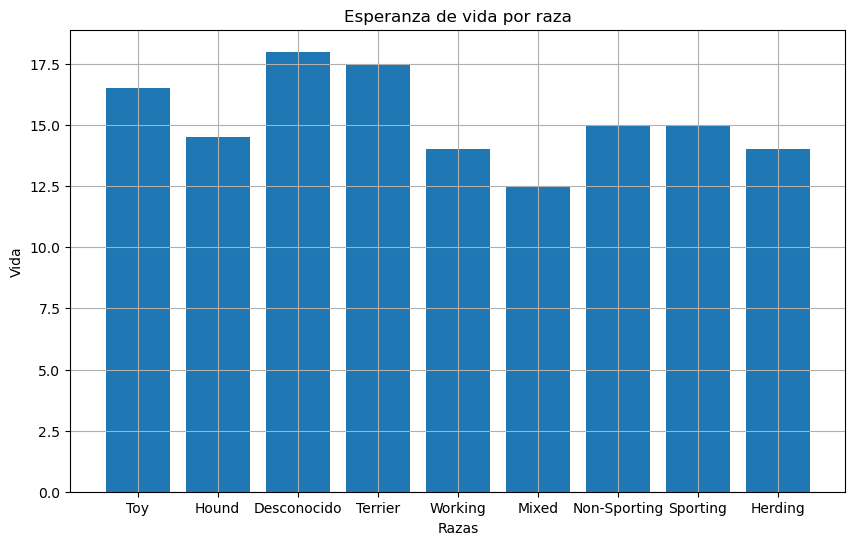

In [210]:
# Grafico draza por esperanza de vida
fig = plt.figure(figsize=(10,6))
plt.bar(Info_perros['breed_group'], Info_perros['life_avg'])
plt.grid()
plt.title('Esperanza de vida por raza')
plt.xlabel('Razas')
plt.ylabel('Vida')

In [214]:
Info_perros = Info_perros.assign(temperamento=Info_perros['temperament'].str.split(',\s*')).explode('temperamento')

In [221]:
conteo = Info_perros['temperamento'].value_counts()

In [215]:
Info_perros.head()

,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history,imperial_weight,metric_wight,imperial_height,metric_height,min_years,max_years,life_avg,temperamento
0,1,Affenpinscher,"Small rodent hunting, lapdog",Toy,"10,12","Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,Desconocido,Desconocido,Desconocido,6 - 13,3 - 6,9 - 11.5,23 - 29,10.0,12.0,11.0,Stubborn
0,1,Affenpinscher,"Small rodent hunting, lapdog",Toy,"10,12","Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,Desconocido,Desconocido,Desconocido,6 - 13,3 - 6,9 - 11.5,23 - 29,10.0,12.0,11.0,Curious
0,1,Affenpinscher,"Small rodent hunting, lapdog",Toy,"10,12","Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,Desconocido,Desconocido,Desconocido,6 - 13,3 - 6,9 - 11.5,23 - 29,10.0,12.0,11.0,Playful
0,1,Affenpinscher,"Small rodent hunting, lapdog",Toy,"10,12","Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,Desconocido,Desconocido,Desconocido,6 - 13,3 - 6,9 - 11.5,23 - 29,10.0,12.0,11.0,Adventurous
0,1,Affenpinscher,"Small rodent hunting, lapdog",Toy,"10,12","Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,Desconocido,Desconocido,Desconocido,6 - 13,3 - 6,9 - 11.5,23 - 29,10.0,12.0,11.0,Active


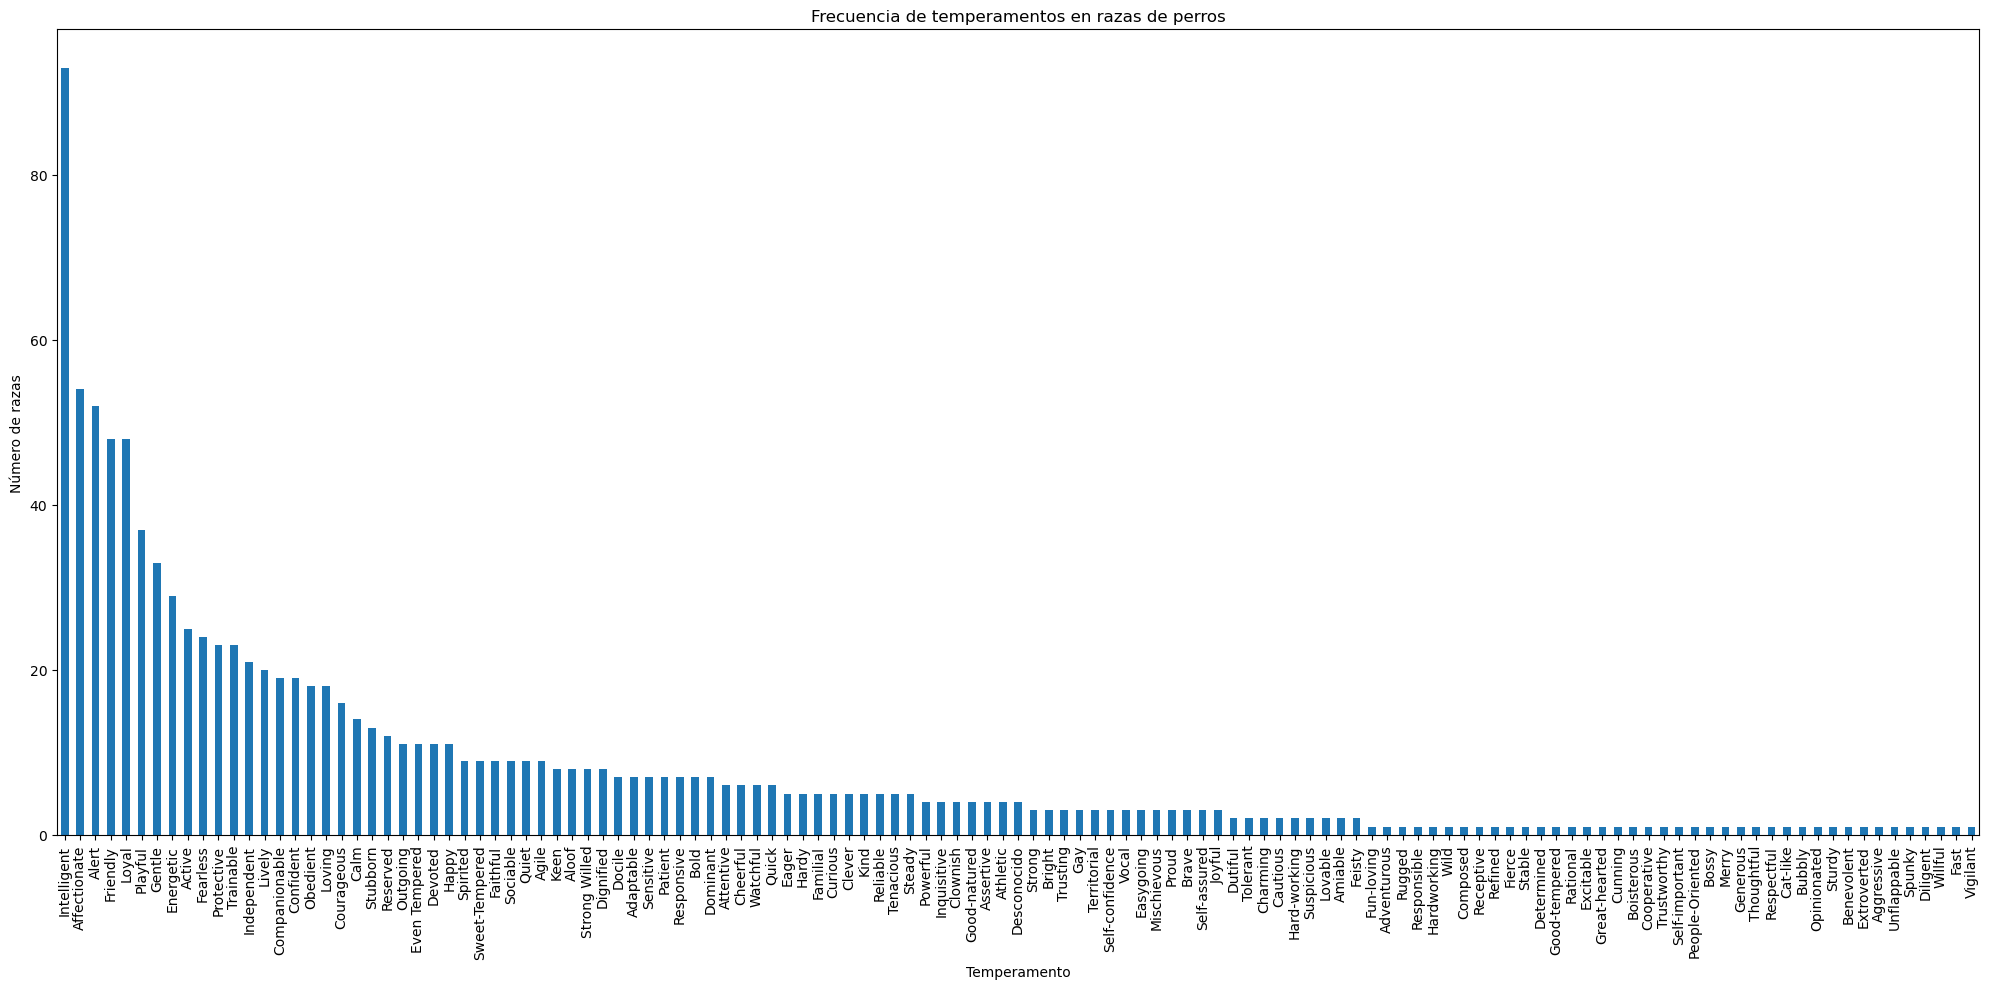

In [227]:
# grafico temperamento por raza
fig = plt.figure(figsize=(20,10))
conteo.plot(kind='bar')
plt.title("Frecuencia de temperamentos en razas de perros")
plt.xlabel("Temperamento")
plt.ylabel("Número de razas")
plt.tight_layout()
plt.show()